In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
#load the data csv
gold_data=pd.read_csv("C:\\Users\\kotha\\OneDrive\\Desktop\\gld_price_data.csv")

In [8]:
#print the data frame
gold_data.head()
#GLD=gold price we are going to predcit the gld value

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
gold_data.tail()
#out of 6 columns we are predicting the Gld column

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
#number of rowas and columns in the given data frame using the function shape 
gold_data.shape

(2290, 6)

In [12]:
#we will use the data type  for the predictipons
#We will get basic data imformaion
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
#WE can also check the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
#Lets gets some the statistical mesaures of the data like mean standard deviation 25 percent means 25 percent of the valuess less than 1239
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
#we can get the corelation values there are two corelation 1.positive corelation and 2. negative corelation
correlation=gold_data.corr()

<AxesSubplot:>

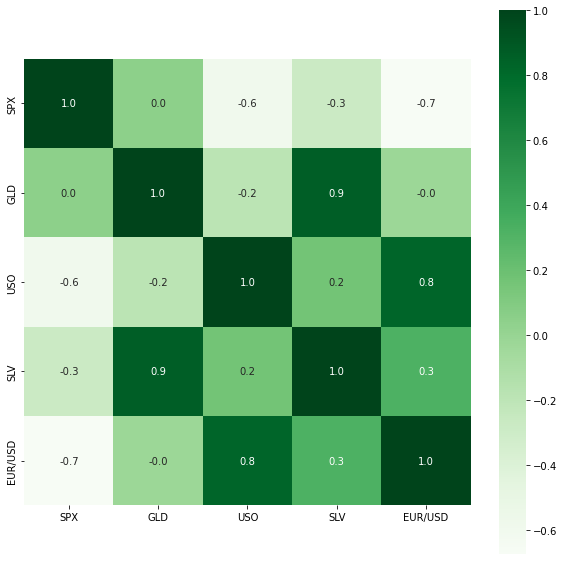

In [24]:
#constrcuting the heat map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Greens')

In [19]:
#In the heat map negative correlation has negative values and positove corelation has positive values
#For example if uso value decreases then spx value increases this is about corelation heat map or corelation statistics
#fmt.1f means no of decimal points and cbar is true means the values bar colour

In [25]:
#lets see the correlation values of  gld
print(correlation['GLD'])
#only silver is positively correlated

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


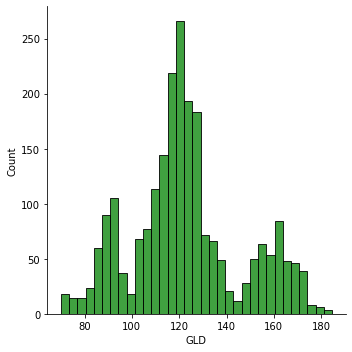

In [30]:
#lets check the distribution of price
sns.displot(gold_data['GLD'],color='green')

In [28]:
#the more values are in 120 range

In [31]:
#Now we need only gold rates now we need to split the columns 
#splitting the feauters and target 
X=gold_data.drop(['Date','GLD'],axis=1)#when we are dropping the column we need to keed axis is 1 for row its 0
Y=gold_data['GLD']

In [33]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [34]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [35]:
#now we will split the data in to testing data and the training data
#we will train our machine learning algorithm with the training data and we will evulate the with the test data 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [37]:
#Model training
#random forest regressor
regressor=RandomForestRegressor(n_estimators=100)

In [39]:
regressor.fit(X_train,Y_train) 
#both x tarin and y train represents the data but x train represents all the features and y train represents the gold prices which are yh x train


RandomForestRegressor()

In [40]:
#model evaluation
#prediction on test data 
#create a model on test data
test_data_prediction=regressor.predict(X_test)

In [41]:
print(test_data_prediction)
#these are the values predicted by the model

[168.62209949  82.02349974 115.7171003  127.7411008  120.68450169
 154.72119844 150.38329874 126.07110053 117.45859867 125.92400111
 116.66730091 171.82020107 141.47089894 167.56359888 115.24729991
 117.62950066 139.95300311 170.15440043 159.2203028  160.08420034
 155.07550008 125.11680054 176.07699994 157.08600362 125.31780042
  93.73889976  77.6482002  120.29100014 119.11529938 167.47949995
  88.18970036 125.23599995  91.2717008  117.55679998 121.15779872
 136.82070028 115.33240133 115.25190092 147.44949981 107.07850092
 104.41990254  87.04929769 126.4732005  117.94300038 151.90759858
 119.56329998 108.35339987 108.13819843  93.12060029 127.06029819
  74.76250029 113.65199903 121.35610021 111.26589892 118.85149873
 120.57099986 159.69149988 168.42310059 146.96339689  85.77839886
  94.48940036  86.80879909  90.50430036 118.9584008  126.40850065
 127.73570021 169.08580023 122.26879947 117.63669888  98.36740027
 168.66420245 143.36839804 132.4764023  121.25580202 120.33439942
 119.74610

In [42]:
#Now we need to compare the predicted values with the actual values thats why we are using the metrics
#R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.9891268309653707


In [43]:
#compare the actual values and predicted values
Y_test=list(Y_test)

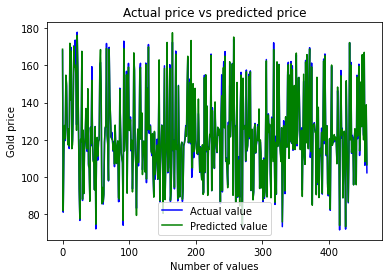

In [46]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()


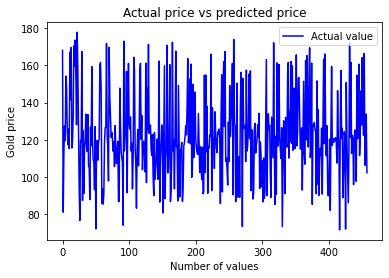

In [47]:
#actual are slightly mode than predicted because of that .98 error 
#for actual value
plt.plot(Y_test,color='blue',label='Actual value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

